[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal distributiion')]

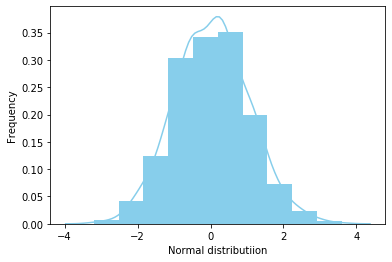

In [2]:
#Distribusi Normal

#memanggil pustaka
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

data_normal = norm.rvs(size=1000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                bins=10,kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

ax.set(xlabel='Normal distributiion', ylabel='Frequency')

In [3]:
import pandas as pd

data_cov = pd.read_csv("/home/not/Downloads/Covid-19_province.csv")
data_cov[-5:]

,Type,Features Type,ID-number,Province_code,Province_name,Confirmed_cases,Recovered_cases,Death_cases,Features Geometry Type,Features Geometry Coordinates
29,FeatureCollection,Feature,30,76,Sulawesi Barat,1036,841,14,Point,"119.34347138300006,-2.461902014999964"
30,FeatureCollection,Feature,31,81,Maluku,3863,3266,47,Point,"129.360425,-3.126119342999971"
31,FeatureCollection,Feature,32,82,Maluku Utara,2232,1946,75,Point,"128.01592944200002,0.869337001000019"
32,FeatureCollection,Feature,33,94,Papua,9037,4637,129,Point,"140.0000000000001,-5"
33,FeatureCollection,Feature,34,91,Papua Barat,4189,3655,66,Point,"132.9683417120001,-2.041723281999964"


In [37]:
data_cov = data_cov.drop(columns=['Type','Features Type','ID-number'])
data_cov[:15]

KeyError: "['Type' 'Features Type' 'ID-number'] not found in axis"

In [5]:
import numpy as np

conf_case = np.array(data_cov['Confirmed_cases'])
reco_case = np.array(data_cov['Recovered_cases'])
prov_name = np.array(data_cov['Province_name'])

print(conf_case[:5]) 
print(reco_case[:5])
print(prov_name[:5])

[ 7797 13277 16709 14841  1399]
[ 6258 10846 13386 11490   892]
['Aceh' 'Sumatera Utara' 'Sumatera Barat' 'Riau' 'Jambi']


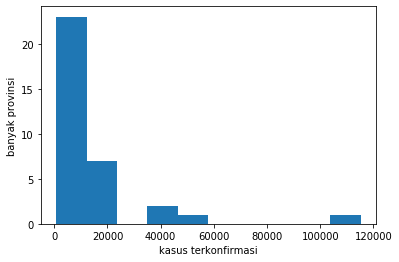

In [7]:
dir_python = "/home/not/Project/Python/Gambar/"

conf_fig = plt.figure()
conf_vis = plt.hist(conf_case)
plt.ylabel("banyak provinsi")
plt.xlabel("kasus terkonfirmasi")
plt.show()
conf_fig.savefig(dir_python+'conf_cases.png')

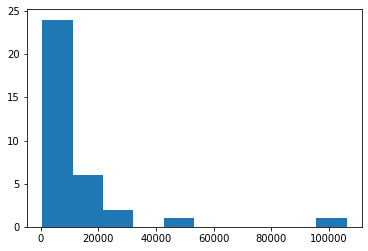

In [8]:
reco_fig = plt.figure()
reco_vis = plt.hist(reco_case)
plt.show()
reco_fig.savefig('reco_cases.png')

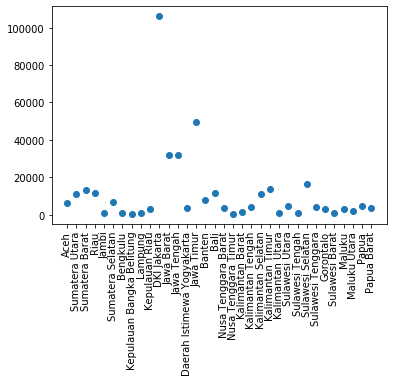

In [9]:
cov_fig = plt.figure()
plt.scatter(prov_name,reco_case)
plt.xticks(rotation=90)
plt.show
cov_fig.savefig('covid_per_provinsi.png')

In [10]:
parameter_covid = np.array(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']])

parameter_covid[:5]

array([[ 7797,  6258,   282],
       [13277, 10846,   542],
       [16709, 13386,   311],
       [14841, 11490,   340],
       [ 1399,   892,    27]])

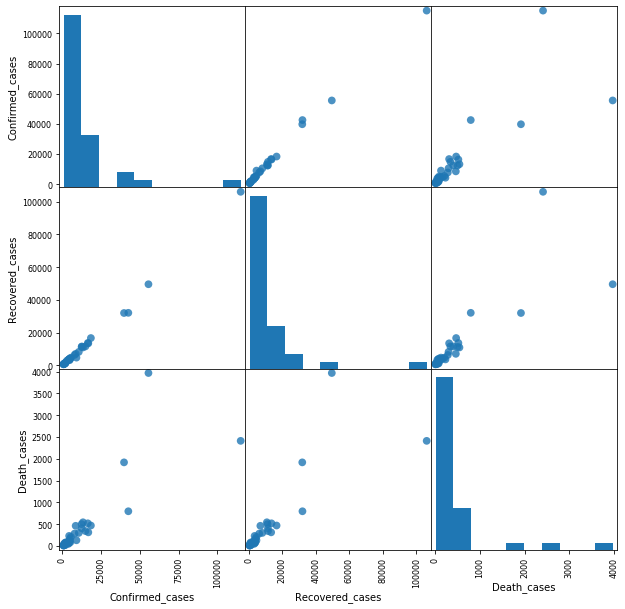

In [20]:
pair = pd.plotting.scatter_matrix(data_cov[['Confirmed_cases',
                                     'Recovered_cases',
                                     'Death_cases']], figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)
plt.show()

In [42]:
!pip install mime

    100% |████████████████████████████████| 829kB 532kB/s ta 0:00:01
  Running setup.py bdist_wheel for mime ... done
  Stored in directory: /home/not/.cache/pip/wheels/18/fa/95/b3b92f350c8df57becba1faad2ef598cfbeb56188570e6ab8e
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/not/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built mime future


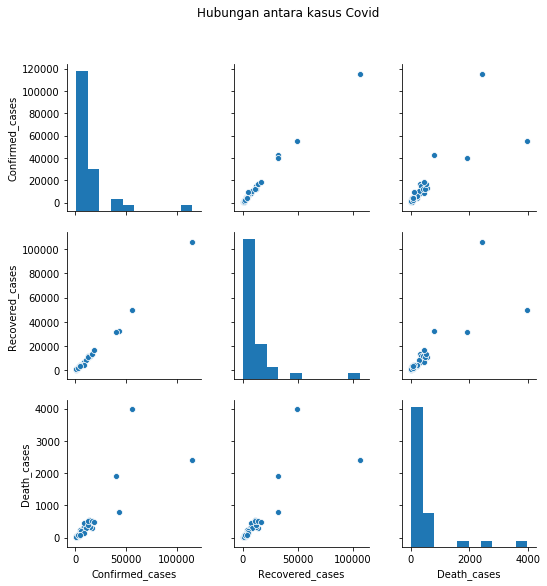

In [53]:
pair_cov = sns.pairplot(data_cov_prov)
pair_cov.fig.suptitle("Hubungan antara kasus Covid", y=1.08)
pair_cov.savefig("pair_covid.png")

In [55]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage


str_dari = 'contoh_dari@gmail.com'
str_kepada = 'contoh_kepada@gmail.com'

#membangun isi pada halaman surel
msg_root = MIMEMultipart('related')
msg_root['Subject'] = 'Pair covid visualization'
msg_root['From'] = str_dari
msg_root['To'] = str_kepada
msg_root.preamble = 'This is a multi-part message in MIME format.'

msg_alternative = MIMEMultipart('alternative')
msg_root.attach(msg_alternative)

msg_text = MIMEText('Sebuah pesan alternatif')
msg_alternative.attach(msg_text)

msg_text = MIMEText('<p> Disini saya lampirkan sebuah gambar'+
                    '<b>visualisasi covid</b></p>.<br><img src="cid:image1"><br>Hubungan Kasus Covid!', 'html')
msg_alternative.attach(msg_text)

#memuat gambar
fp = open('pair_covid.png', 'rb')
msg_gambar = MIMEImage(fp.read())
fp.close()

# Mendefiniskan ID gambar
msg_gambar.add_header('Content-ID', '<image1>')
msg_root.attach(msg_gambar)

# mengirim email menggunakan smtplib
import smtplib

provider = 'smtp.gmail.com'
email_pengguna = 'contoh@gmail.com'
pass_pengguna = input('masukan password anda:')

smtp = smtplib.SMTP_SSL(provider, 465)
smtp.ehlo()
smtp.login(email_pengguna, pass_pengguna)
    #mengirim email dengan komponen yang telah dibuat dengan MIME
smtp.sendmail(str_dari, str_kepada, msg_root.as_string())
smtp.quit()
print('Email Terkirim')

masukan password anda: *****


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials d4sm1422621pgq.32 - gsmtp')